
# ES9ZR AI and Machine Learning for Diagnostics

## Python Lecture/Lab 4: Data Preparation and Feature Extraction

Welcome to the lab tutorial of week 4.  The main purpose of this lab practice is to introduce the basic methods of data preparation (preprocessing) and feature extraction (feature selection and feature dimensionality reduction) for our machine learning algorithms.

By the end of this Lab tutorial, you should be able to:

1 Understand the fundamentals and importance of data preparation and feature extraction.

2 Apply basic data preparation methods to the raw dataset so that the missing values and outliners are properly handled.

3 Apply basic feature selection methods like pricipal component analysis (PCA).

4 Reflect on the previous data analysis you have done and compare one with what you have learned today.




Let's start with a virtural diabetes cases dataset. I will first demonstarte how to prepare the data and then apply PCA for feature extraction.

In [ ]:
# Description for each colunm

# 1 Preg (Pregnancies):
# Description: This denotes the number of times a woman has been pregnant.
# Relevance: Pregnancy can affect the body's demand for insulin, potentially leading to gestational diabetes. The number of pregnancies can indicate potential stress on the body's glucose regulation mechanisms.

# 2 Glu (Glucose):
# Description: Plasma glucose concentration after 2 hours in an oral glucose tolerance test.
# Relevance: This is a primary test to determine diabetes. Higher glucose levels can indicate difficulty in processing sugar, leading to diabetes.

# 3 BP (Blood Pressure):
# Description: Diastolic blood pressure (mm Hg).
# Relevance: Elevated blood pressure can be associated with an increased risk of diabetes. It can also be a sign of other potential health issues that are common in diabetics.

# 4 ST (Skin Thickness):
# Description: Triceps skin fold thickness (mm).
# Relevance: Increased skin thickness can be indicative of insulin resistance and has been used in some diabetes prediction models.

# 5 Ins (Insulin):
# Description: 2-hour serum insulin (mu U/ml).
# Relevance: Insulin is a hormone that helps regulate glucose in the bloodstream. Abnormal levels can indicate issues with insulin production or resistance.

# 6 BMI:
# Description: Body Mass Index.
# Relevance: BMI is a measure of body fat based on height and weight. A higher BMI can indicate obesity, which is a major risk factor for diabetes.

# 7 DPF (Diabetes Pedigree Function):
# Description: A function that represents how likely individuals are to get diabetes based on their ancestry.
# Relevance: Some individuals may have a genetic predisposition to diabetes. This function takes into account family history.

# 8 Age:
# Description: Age in years.
# Relevance: The risk of developing diabetes can increase with age, especially after 45 years. It's an important feature to consider in predicting the onset of diabetes.

# 9 Outcome:
# Description: Class variable (0 or 1). 0 indicates that the individual tested negative for diabetes, while 1 indicates positive.
# Relevance: This is the target variable we are trying to predict based on the other features.

import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

rawdata = [
    [6, 148, 72, 35, 160, 33.6, 0.727, 200, 1],
    [1, 65, 66, 29, None, 26.6, 0.351, 31, 0],
    [8, 183, 64, None, None, 23.3, 0.672, 32, 1],
    [0, 137, 40, 35, 168, 43.1, 0.884, 33, 1],
    [5, 76, 74, None, None, 25.6, 0.201, 30, 0],
    [3, 178, 50, 32, 88, 31.0, 0.648, 26, 1],
    [10, 95, None, None, 0, 35.3, 0.134, 29, 0],
    [2, 197, 70, 45, 543, 30.5, 0.558, 53, 1],
    [4, 100, 92, 0, 0, 37.6, 0.191, 30, 0],
    [10, 168, 74, None, None, 38.0, 0.537, 34, 1],
    [1, 189, 60, 23, 846, 30.1, 0.698, 59, 1],
    [7, 70, None, None, None, 30.0, 0.584, 32, 1],
    [0, 118, 84, 47, 230, 45.8, 0.551, 31, 1],
    [7, 107, 74, None, None, 29.6, 0.254, 31, 1],
    [1, 83, 30, 38, 83, 43.3, 0.183, 33, 0],
    [1, 115, 70, 30, 96, 34.6, 0.629, 32, 1],
    [8, 79, 84, None, None, 35.4, 0.388, 50, 0],
    [7, 196, 90, None, None, 39.8, 0.451, 41, 1],
    [9, 119, 80, 35, None, 29.0, 0.263, 29, 1],
    [11, 143, 94, 33, 146, 36.6, 0.654, 51, 1],
    [10, 125, 70, 26, 115, 31.1, 0.405, 41, 1],
    [1, 67, 66, 15, 140, 23.2, 0.387, 22, 0],
    [13, 85, 82, 19, 110, 22.2, 0.245, 57, 0],
    [13, 67, 82, 19, 110, 22.2, 0.245, 57, 0],
    [3, 88, 58, 11, 54, 24.8, 0.267, 22, 0],
    [6, 92, 92, None, None, 19.9, 0.188, 28, 0],
    [10, 112, 78, 31, None, 27.6, 0.512, 45, 0],
    [9, 122, 76, 37, 0, 32.9, 0.665, 46, 1],
    [4, 131, 72, 47, 207, 37.1, 0.790, 56, 1],
    [7, 105, 0, None, None, 0.0, 0.159, 28, 0], #
    [9, 102, 76, 38, 0, 32.9, 0.765, 46, 1],
    [2, 90, 68, 42, None, 36.2, 0.503, 27, 1],
    [4, 121, 72, 47, 217, 37.1, 0.990, 56, 1],
    [3, 80, 64, None, None, 34.0, 0.271, 26, 0],
    [7, 43, 84, None, None, 40.2, 0.696, 37, 0],
    [7, 66, 92, 18, None, 22.7, 0.245, 48, 0],
    [9, 171, 120, 24, 240, 45.4, 0.721, 54, 1],
    [7, 159, 64, None, None, 27.3, 0.294, 40, 0],
    [0, 170, 66, 39, 0, 42.0, 0.893, 25, 1],
    [11, 143, 94, 33, 146, 36.6, 0.654, 51, 1],
    [10, 125, 70, 26, 115, 32.1, 0.405, 41, 1],
    [1, 97, 66, 15, 150, 23.2, 0.287, 22, 0],
    [13, 185, 82, 19, 110, 27.2, 0.145, 57, 0],
    [16, 145, 83, 17, 110, 22.2, 0.545, 57, 0],
    [3, 86, 58, 11, 54, 25.8, 0.467, 22, 0],

]

VirtualData = pd.DataFrame(rawdata, columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"])

print(VirtualData.columns)
print(VirtualData.shape)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
(45, 9)


In [ ]:
###### data cleaning
#####  Step 1 identify Nan value
nan_values = VirtualData.isna()
print(nan_values)


    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0         False    False          False          False    False  False   
1         False    False          False          False     True  False   
2         False    False          False           True     True  False   
3         False    False          False          False    False  False   
4         False    False          False           True     True  False   
5         False    False          False          False    False  False   
6         False    False           True           True    False  False   
7         False    False          False          False    False  False   
8         False    False          False          False    False  False   
9         False    False          False           True     True  False   
10        False    False          False          False    False  False   
11        False    False           True           True     True  False   
12        False    False          Fals

In [ ]:
### after identify those nan/missing value, you can either
### 1 delete this case or
VirtualData = VirtualData.dropna()
print(VirtualData.shape)
print(VirtualData.isna())


### 2 assign the mean/median/mode value to this case
# VirtualData.fillna(VirtualData.median(), inplace=True)



(27, 9)
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0         False    False          False          False    False  False   
3         False    False          False          False    False  False   
5         False    False          False          False    False  False   
7         False    False          False          False    False  False   
8         False    False          False          False    False  False   
10        False    False          False          False    False  False   
12        False    False          False          False    False  False   
14        False    False          False          False    False  False   
15        False    False          False          False    False  False   
19        False    False          False          False    False  False   
20        False    False          False          False    False  False   
21        False    False          False          False    False  False   
22        False    False      

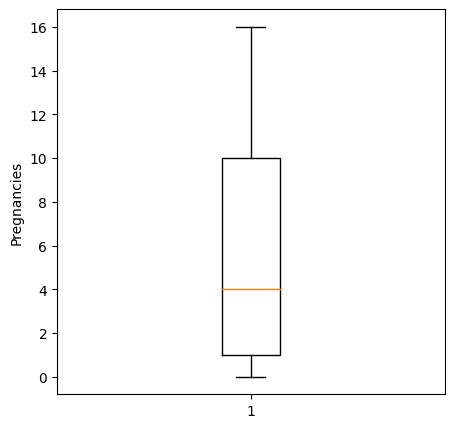

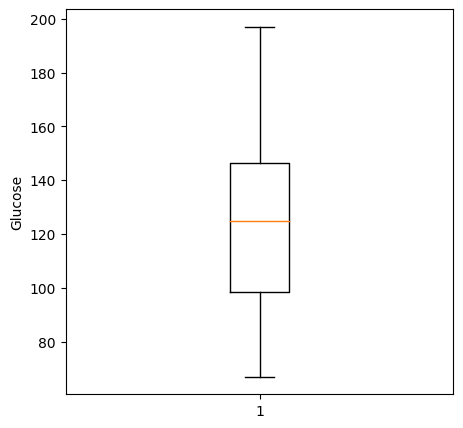

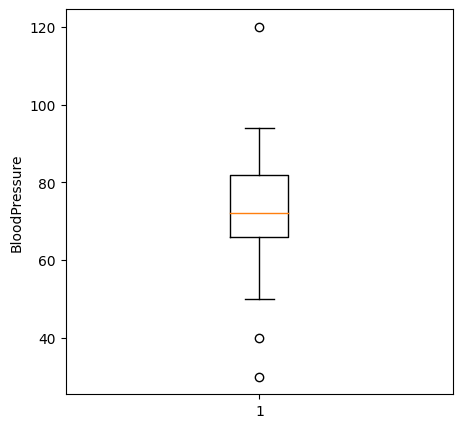

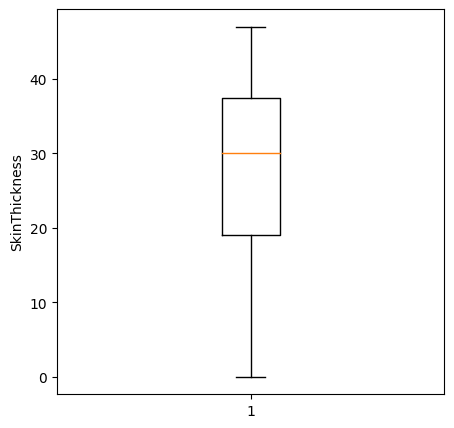

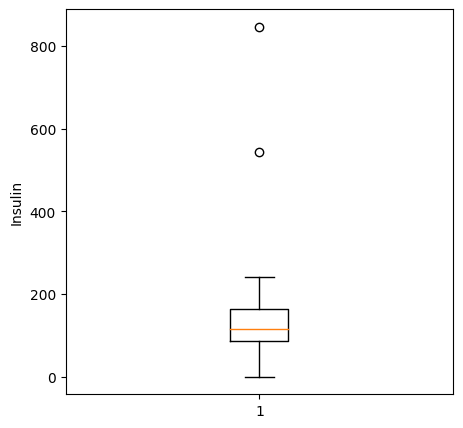

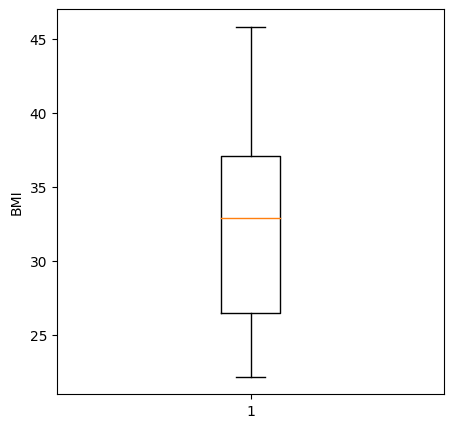

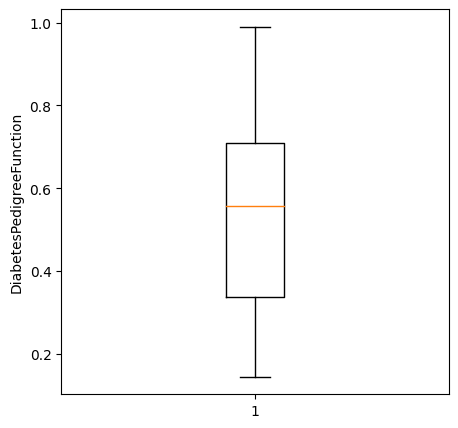

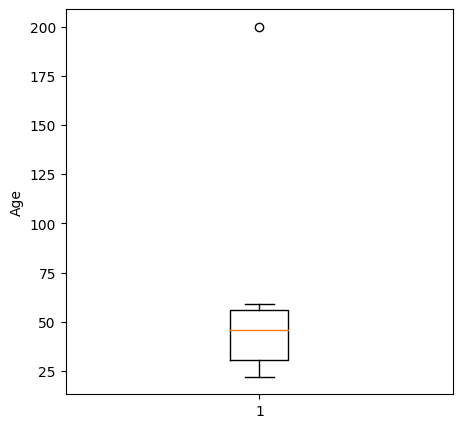

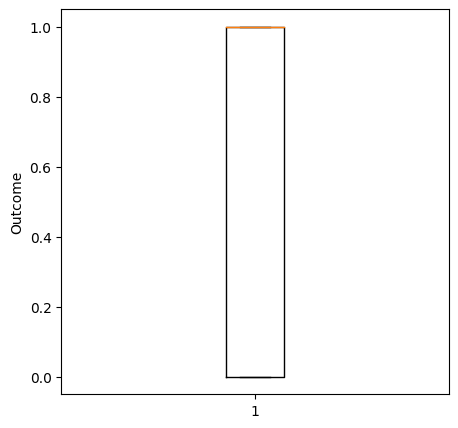

In [ ]:

##### Step 2 identify outliner
###### plot it and check it
for i in range(len(VirtualData.columns)):
  plt.figure(figsize=(5, 5))
  plt.boxplot(VirtualData.iloc[:,i])
  plt.ylabel(VirtualData.columns[i])

In [ ]:
#### By checking the plot we can identify that there are several outliners. For example, the age can't be 500 years old for a human being.
### Hence, you can either delete it or assign a value (mean/median/model) or check with experiment raw record

VirtualData = VirtualData[VirtualData['Age']<120]
print(VirtualData.head)

<bound method NDFrame.head of     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             0      137           40.0           35.0    168.0  43.1   
5             3      178           50.0           32.0     88.0  31.0   
7             2      197           70.0           45.0    543.0  30.5   
8             4      100           92.0            0.0      0.0  37.6   
10            1      189           60.0           23.0    846.0  30.1   
12            0      118           84.0           47.0    230.0  45.8   
14            1       83           30.0           38.0     83.0  43.3   
15            1      115           70.0           30.0     96.0  34.6   
19           11      143           94.0           33.0    146.0  36.6   
20           10      125           70.0           26.0    115.0  31.1   
21            1       67           66.0           15.0    140.0  23.2   
22           13       85           82.0           19.0    110.0  22.2   
23           13      

In [ ]:
### Step 3 Check duplicate cases
### Sometimes the same case may be recored twice so please make sure you check the record for duplication
duplicate_rows = VirtualData[VirtualData.duplicated()]
print(duplicate_rows)

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
39           11      143           94.0           33.0    146.0  36.6   

    DiabetesPedigreeFunction  Age  Outcome  
39                     0.654   51        1  


In [ ]:
#### if there are duplicates lines, delete them
VirtualData = VirtualData.drop_duplicates()
# duplicate_rows = VirtualData[VirtualData.duplicated()]
# print(duplicate_rows)


**Feature selection - PCA**

To increase model performance and reduce computation cost, sometimes we need to reduce the features/dimentions of the dataset.

Did you remember the following two slides from our lecture this week? (By Dr. Muhammad Salman Haleem)

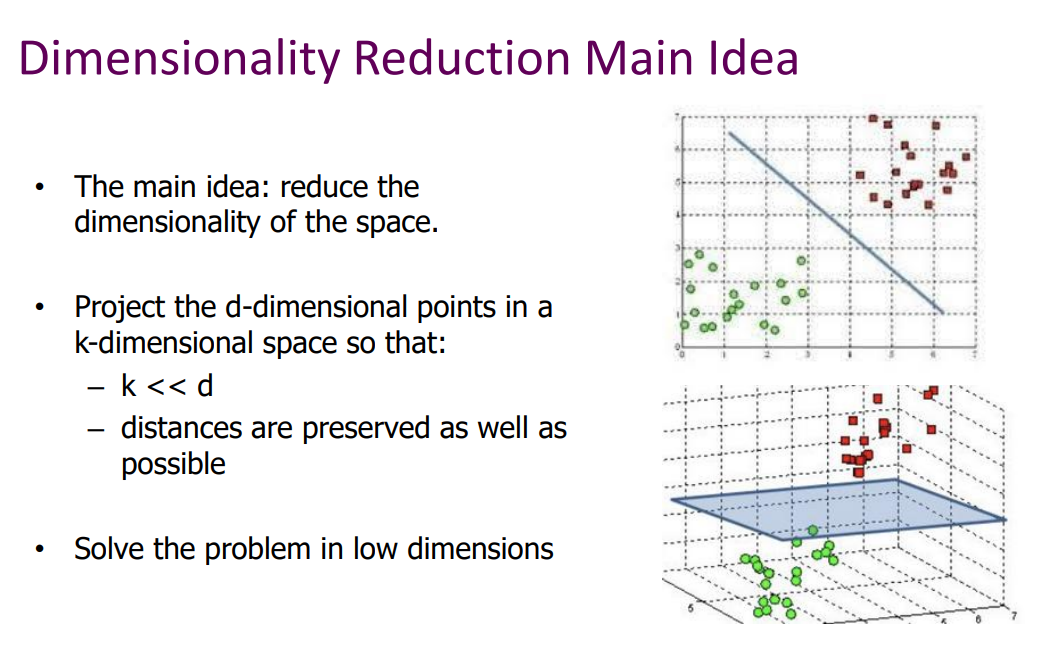

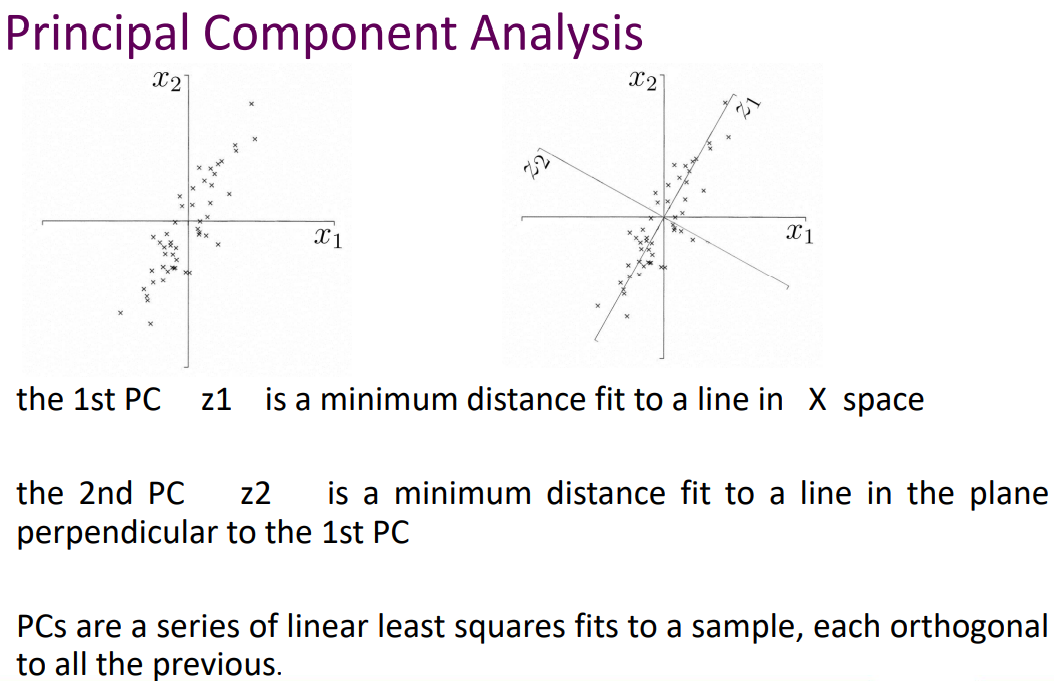

In [10]:
###### let's start from a very basic example: convert a 3 dimentional dataset to a two dimentional dataset

import numpy as np

# Step 1: Standardize the dataset
X = np.array([[1, 2, 1], [3, 3, 2], [5, 5, 3], [6, 6, 5]])
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std
# print(X_normalized)


# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_normalized, rowvar=False)
# print(cov_matrix)

# Step 3: Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


# Step 4: Select the eigenvectors with the two largest eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
top_2_vectors = eigenvectors[:, sorted_indices[:2]]

# Step 5: Transform the original matrix
X_pca = np.dot(X_normalized, top_2_vectors)

print(f"the new dataset is {X_pca}")

#### Step 6: present the eigenvectors
print(f"Transform_vectors is {top_2_vectors}")


the new dataset is [[ 2.24068565  0.14395054]
 [ 0.88379346 -0.03385012]
 [-0.84065871 -0.37700624]
 [-2.2838204   0.26690582]]
Transform_vectors is [[-0.57804634 -0.53394072]
 [-0.58116337 -0.26144992]
 [-0.57281023  0.8040841 ]]


[[ 0.22525241 -0.40919219  0.03004495 -0.49356672 -0.30947773 -0.41475236
  -0.49200236 -0.16568038]
 [-0.5527972  -0.23480868 -0.4876189   0.05201531 -0.16090336  0.16834317
   0.01713053 -0.58675342]]
[0.34250253 0.2798776 ]


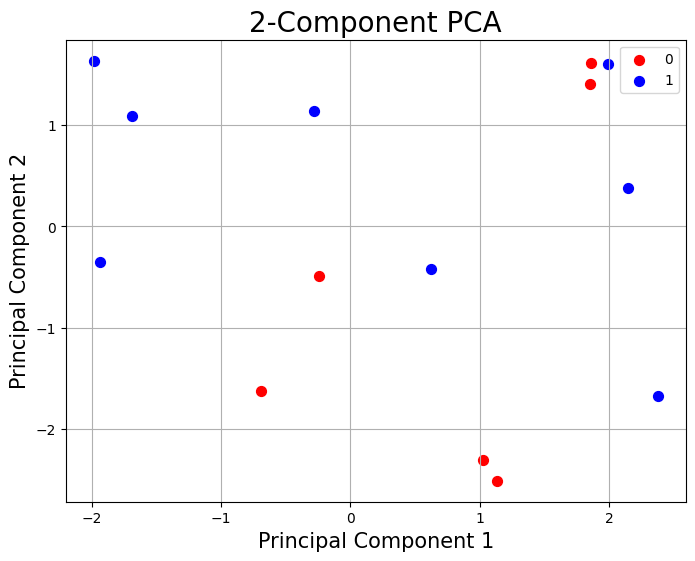

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

##### perform the data preprocessing before your feature selection!

# Separate features and target variable
X = VirtualData.drop("Outcome", axis=1)
y = VirtualData["Outcome"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA, reducing to 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(pca.components_)
print(pca.explained_variance_ratio_)



# Convert results to DataFrame for visualization
df_pca = pd.DataFrame(data = X_pca, columns = ['Principal Component 1', 'Principal Component 2'])
df_pca = pd.concat([df_pca, y], axis=1)

# Visualize the PCA results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2-Component PCA', fontsize=20)

colors = ['r', 'b']
targets = [0, 1]

for target, color in zip(targets, colors):
    indicesToKeep = df_pca['Outcome'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'Principal Component 1'],
               df_pca.loc[indicesToKeep, 'Principal Component 2'],
               c=color,
               s=50)
ax.legend(targets)
ax.grid()
plt.show()


**Now, it is a good time to explore the real data yoursel!**
Please let me know when you are stuck with any task.


Let's try to start from a Real Diabetes Dataset.You can download the data from Kaggle (https://www.kaggle.com/datasets/mathchi/diabetes-data-set).


Sources:

(a) Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases

(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
Research Center, RMI Group Leader
Applied Physics Laboratory
The Johns Hopkins University
Johns Hopkins Road
Laurel, MD 20707
(301) 953-6231

(c) Date received: 9 May 1990


In [ ]:
##### after downloading the data, you can access it with the methods mentioned on week 2 to explore the data
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

##### access from local
# YourPathToCSV = r"/content/diabetes.csv"
# data = np.genfromtxt(YourPathToCSV, delimiter=',', skip_header=1)  #
# Rawdata = pd.read_csv(YourPathToCSV)
# print (Rawdata.columns)
# url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
# data_online = pd.read_csv(url)
# print(data_online.head())
# for i in range(len(data_online.columns)):
#   plt.figure(figsize=(5, 5))
#   plt.boxplot(data_online.iloc[:,i])
#   plt.ylabel(data_online.columns[i])

**Task 1 Data cleaning**

Task 1.0 Load the data from your harddrive or online source

Task 1.1 Identify and delete/replcae the missing data

Task 1.2 Identify and delete/replcae the outliners

Task 1.3 Identify and delete the duplicates


NaN = not a number
[] = not data
Impossible data or outliner

e.g.: 0,-1,1000000 for ages

In [ ]:
###### use build in fuction to find the error/missing data
# df.isnan()

#######################
print("This is task 1.0")

In [ ]:
print("This is task 1.1")

In [ ]:
print("This is task 1.2")

In [ ]:
print("This is task 1.3")

**Task 2 Use PCA to reduce the features (n=8) in this data set to 1 or 2**

In [ ]:
print("This is task 2")


**Task 3 let's share and discuss your experiance in data preprocessing and features selection**

**What else can we do with these missing/error data?**

1 check input/redo the experiment

2 replace with the mean/median/mode and stated as a limitation

3 if it is a time series data, filled it with the adjacunt data point or inerplot it

4deleted the row if not nessesary

5ignore it (kidding)

##By Zhizhuo Su, 22/10/2023##